# Assignment_5

 a) Apply Data pre-processing

 b) Perform data-preparation (Train-Test Split)

 c) Apply Machine Learning Algorithm

 d) Evaluate Model.
 
 e) Apply Cross-Validation and Evaluate Mode

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [13]:
# Load the dataset
df = pd.read_csv('F:\ml\Mall_Customers.csv')

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\yashr\AppData\Local\Temp\ipykernel_20656\1851772198.py:2: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('F:\ml\Mall_Customers.csv')


In [14]:
df.rename(columns={'Genre': 'Gender', 'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [15]:
df.drop('CustomerID', axis=1, inplace=True)

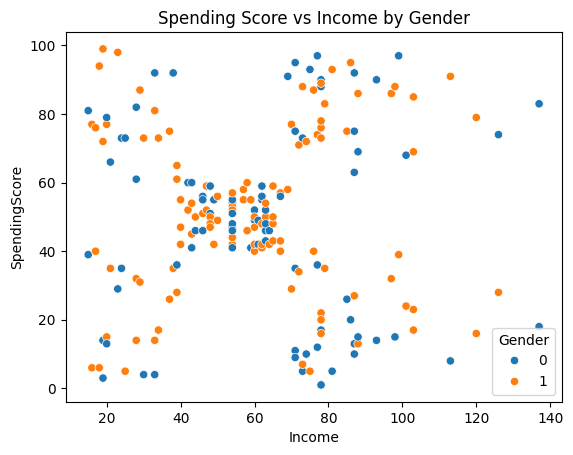

In [16]:
sns.scatterplot(x='Income', y='SpendingScore', data=df, hue='Gender')
plt.title("Spending Score vs Income by Gender")
plt.show()

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Income', 'SpendingScore']])

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)

In [19]:
from sklearn.cluster import KMeans

# Find optimal k using Elbow method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

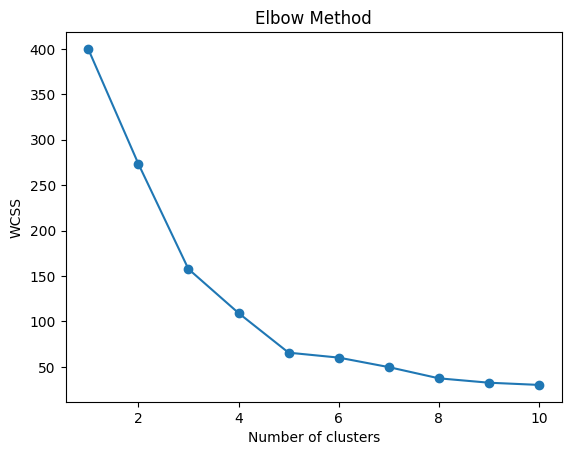

In [20]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

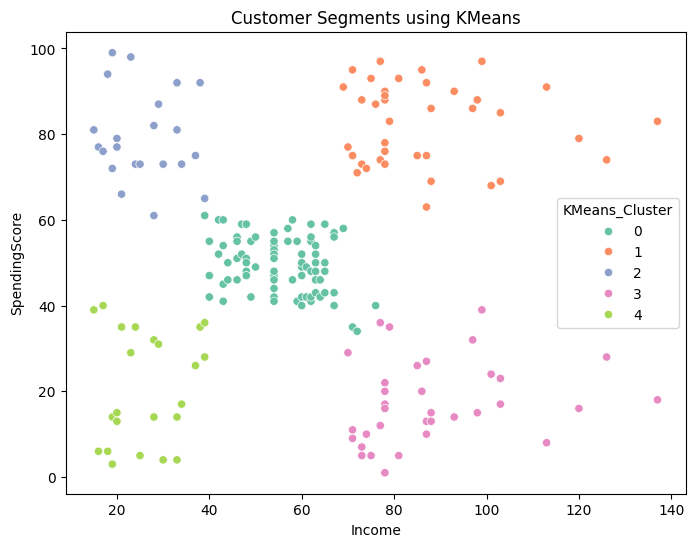

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['SpendingScore'], hue=df['KMeans_Cluster'], palette='Set2')
plt.title("Customer Segments using KMeans")
plt.show()

In [23]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

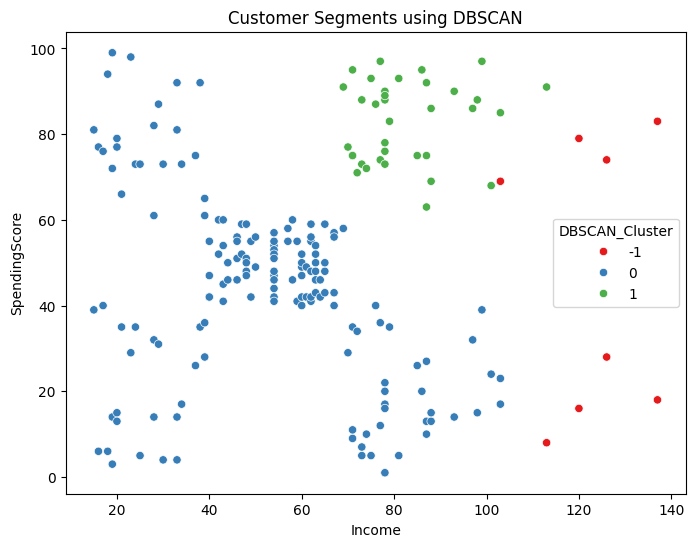

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['SpendingScore'], hue=df['DBSCAN_Cluster'], palette='Set1')
plt.title("Customer Segments using DBSCAN")
plt.show()

In [25]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate KMeans
print("KMeans Silhouette Score:", silhouette_score(scaled_data, df['KMeans_Cluster']))
print("KMeans Davies-Bouldin Index:", davies_bouldin_score(scaled_data, df['KMeans_Cluster']))

KMeans Silhouette Score: 0.5546571631111091
KMeans Davies-Bouldin Index: 0.5722356162263352


In [26]:
filtered_dbscan = df[df['DBSCAN_Cluster'] != -1]
print("DBSCAN Silhouette Score:", silhouette_score(scaled_data[df['DBSCAN_Cluster'] != -1], filtered_dbscan['DBSCAN_Cluster']))
print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(scaled_data[df['DBSCAN_Cluster'] != -1], filtered_dbscan['DBSCAN_Cluster']))

DBSCAN Silhouette Score: 0.3875583892728279
DBSCAN Davies-Bouldin Index: 0.7888642629621753
